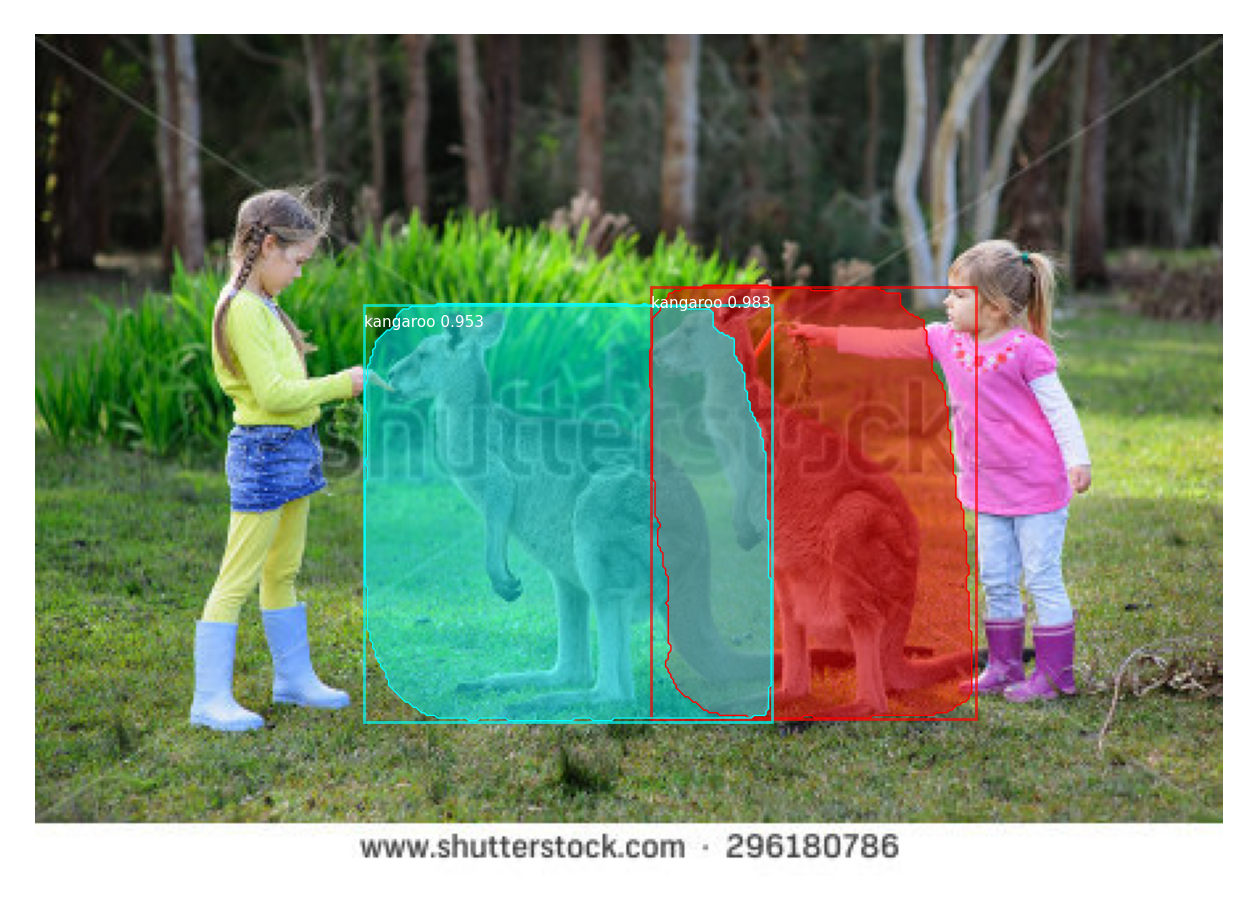

In [10]:
import sys

parent_dir = r'C:\Users\Wint3\Documents\00\ESPRIT\sem8\Deep-Learning\DL-Projet\mask-rcnn\pdl'
sys.path.append(parent_dir)

import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG', 'kangaroo']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath=r"C:\Users\Wint3\Documents\00\ESPRIT\sem8\Deep-Learning\DL-Projet\mask-rcnn\pdl\Kangaro_mask_rcnn_trained.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread(r"C:\Users\Wint3\Documents\00\ESPRIT\sem8\Deep-Learning\DL-Projet\mask-rcnn\pdl\00001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])
